# **Assignment 2 - Introduction to Python for Data Science Program**

This assignment is a project intended as the second assignment in a self-study class at PT Hacktivate Teknologi Indonesia. In this project, we will analyze the NYC Property Sales data from September 2016 to September 2017. Students are asked to formulate questions, then answer and drawing conclusions from the overall analysis that has been made. This assignment is made by taking into account all the assessment rubrics that have been set and will be checked by the teacher of each class.


**Project Overview**

Dataset NYC Property Sales From Kaggle. This dataset is a record of every building or building unit (apartment, etc) sold in New York City property market over a 12-month period from September 2016 to September 2017.

## **Import Library and Load Dataset**

---



In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scistats
import statsmodels.api as sm
import statistics
%matplotlib inline 

In [35]:
# Load dataset with csv
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [37]:
df.shape

(84548, 22)

## **DATA PROCESSING and CLEANING**

In [38]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [39]:
for col in df.columns :
  print(col, 'Unique Value')
  print(df[col].unique())
  print('-'*100)

Unnamed: 0 Unique Value
[    4     5     6 ... 26737 26738 26739]
----------------------------------------------------------------------------------------------------
BOROUGH Unique Value
[1 2 3 4 5]
----------------------------------------------------------------------------------------------------
NEIGHBORHOOD Unique Value
['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPE

In [40]:
df.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)

In [41]:

categoricals = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
                'BUILDING CLASS AT PRESENT', 'SALE PRICE']
for col in categoricals:
    df[col] = df[col].astype('category')


In [42]:
nums = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in nums:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  category
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BUILDING CLASS AT PRESENT       84548 non-null  category
 5   RESIDENTIAL UNITS               84548 non-null  int64   
 6   COMMERCIAL UNITS                84548 non-null  int64   
 7   TOTAL UNITS                     84548 non-null  int64   
 8   LAND SQUARE FEET                58296 non-null  float64 
 9   GROSS SQUARE FEET               56936 non-null  float64 
 10  YEAR BUILT                      84548 non-null  category
 11  TAX CLASS AT TIME OF SALE       84548 non-null  category
 12  BUILDING CLASS AT 

In [44]:
#Menambahkan year, month, date, lalu yang diambil dari kolom 'SALE DATE' menghapus kolom 'SALE DATE'

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.month_name()
df['SALE DATE dt'] = df['SALE DATE'].dt.day
df['SALE DAY'] = df['SALE DATE'].dt.day_name()
df.drop('SALE DATE',inplace=True, axis=1)

#Rename kolom SALE DATE dt menjadi SALE DATE
df.rename(columns={'SALE DATE dt':'SALE DATE'},inplace=True)

In [45]:
#Mengecek jumlah missing values pada setiap kolom
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE YEAR                             0
SALE MONTH                            0
SALE DATE                             0
SALE DAY                              0
dtype: int64

In [46]:
df.dropna(inplace = True)

In [47]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE YEAR                         0
SALE MONTH                        0
SALE DATE                         0
SALE DAY                          0
dtype: int64

In [48]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BUILDING CLASS AT PRESENT         False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE YEAR                         False
SALE MONTH                        False
SALE DATE                         False
SALE DAY                          False
dtype: bool

In [49]:
df['BOROUGH'] = df['BOROUGH'].map({1:'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,SALE MONTH,SALE DATE,SALE DAY
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,July,19,Wednesday
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,September,23,Friday
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,November,17,Thursday
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016,September,23,Friday
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016,November,7,Monday


In [50]:
df.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,SALE YEAR,SALE DATE
count,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,4.824400e+04,48244.000000,48244.000000
mean,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1.153281e+06,2016.646630,16.454357
std,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,1.340131e+07,0.478021,8.819899
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2016.000000,1.000000
25%,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,8.042000e+04,2016.000000,9.000000
50%,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,4.800000e+05,2017.000000,17.000000
75%,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,8.300000e+05,2017.000000,24.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2.210000e+09,2017.000000,31.000000


In [51]:
# #Menghapus Outliers/Pencilan
# # Hitung kuartile 3 setiap atribut pada data
# Q3 = df.quantile(0.75)

# #Hitung kuartile 1 setiap atribut pada data
# Q1 = df.quantile(0.25)

# #Hitung nilai IQR (selisih Q3 dan Q1)
# IQR = Q3 - Q1
# steps = 1.5

# #Mencari data yang berada dalam rentang (bukan outlier)
# df_filtered = df[
#     ~((df < (Q1 - steps* IQR)) |(df > (Q3 + steps * IQR))).any(axis=1)
# ]

# #Melakukan indexing ulang pada dataframe
# df_filtered.index = [i for i in range(len(df_filtered))]
# df = df_filtered

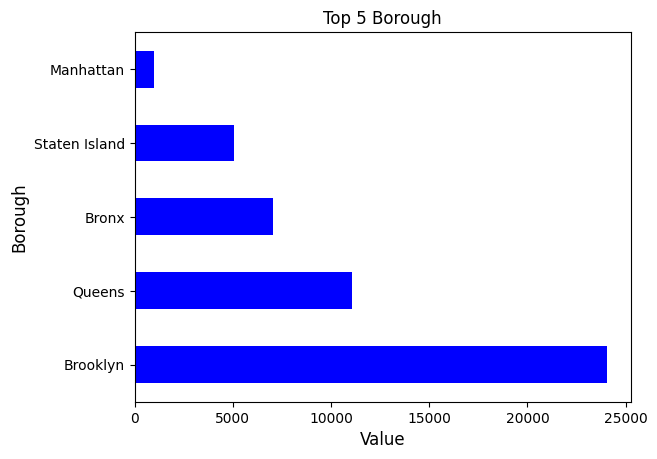

In [52]:
df['BOROUGH'].value_counts().plot(kind = 'barh',
                                  color = 'blue')

plt.title('Top 5 Borough', fontsize = 12)
plt.xlabel('Value', fontsize = 12 )
plt.ylabel('Borough', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 1000x500 with 0 Axes>

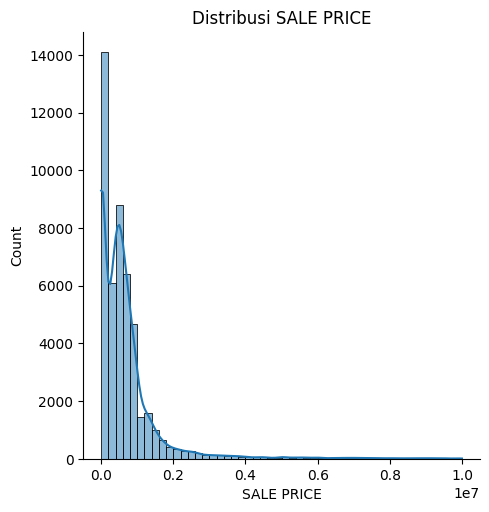

In [53]:
df = df[df['SALE PRICE']<10000000].copy()
plt.figure(figsize=(10,5))
sns.displot(df['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')


# **KESIMPULAN ANALYISIS**

## **A. Measure of Central Tedency**

### **1. Measure of Central Tedency: Mean**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




**Answer no. 1**

In [54]:
avg_answer1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].mean()
print('Mean dari harga jual property di Manhattan sekitar :', avg_answer1)

Mean dari harga jual property di Manhattan sekitar : 3821655.234870317


**Answer no. 2**

In [55]:
avg_answer2 = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].mean()
print('Mean dari harga jual property di Manhattan sekitar :', avg_answer2)

Mean dari harga jual property di Manhattan sekitar : 4539.511527377522


### **2. Measure of Central Tedency: Median**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




**Answer no. 1**

In [56]:
median_answer1 = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].median()
print('Mean dari harga jual property di Manhattan sekitar :', median_answer1)

Mean dari harga jual property di Manhattan sekitar : 3300000.0


**Answer no. 2**

In [57]:
median_answer2 = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].median()
print(median_answer2)

2076.0


### **3. Measure of Central Tedency: Modus**

**Question :**

1.   Berapa nilai rata-rata dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa nilai rata-rata dari luas total semua lantai bangunan (GROSS SQUARE FEET) dan luas tanah properti (LAND SQUARE FEET) di wilayah Manhattan?




In [58]:
modus_answer1 = df[df['BOROUGH']=='Manhattan']['BUILDING CLASS CATEGORY']
modus_bcs = scistats.mode(modus_answer1)

print(modus_bcs.mode)
print(modus_bcs.count)

['07 RENTALS - WALKUP APARTMENTS             ']
[303]


C:\Users\vin16\AppData\Local\Temp\ipykernel_8908\2322620385.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modus_bcs = scistats.mode(modus_answer1)
c:\Users\vin16\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\vin16\AppData\Local\Temp\ipykernel_8908\2322620385.py:2: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can 

In [59]:
# Membuat dataframe baru yang hanya terdapat kolom Manhattan BOROUGH dan GROSS SQUARE FEET
modus_answer2 = df[df['BOROUGH']=='Manhattan']['GROSS SQUARE FEET']
modus_gsf = scistats.mode(modus_answer2)

# Mencetak informasi modus dan jumlah munculnya modus tersebut
print(modus_gsf.mode)
print(modus_gsf.count)

[112850.]
[65]


C:\Users\vin16\AppData\Local\Temp\ipykernel_8908\1413351494.py:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modus_gsf = scistats.mode(modus_answer2)


## **B. Measured of Spread**

### **1. Measured of Spread: Range**

**Question:**

1.   Berapakah range/rentang data dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa range/rentang data dari luas total semua tanah (LAND SQUARE FEET) di wilayah Manhattan?

**Answer no. 1**

In [60]:
df_max = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].max()
df_min = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 9999999.0
Nilai harga jual terendah di wilayah Manhattan adalah 1.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 9999998.0


**Answer no. 2**

In [61]:
df_max = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].max()
df_min = df[df['BOROUGH']=='Manhattan']['LAND SQUARE FEET'].min()
df_range = df_max - df_min

print(f"Luas tanah terbesar di wilayah Manhattan adalah", df_max)
print(f"Luas tanah terkecil di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Luas tanah terbesar di wilayah Manhattan adalah 189025.0
Luas tanah terkecil di wilayah Manhattan adalah 384.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 188641.0


### **2. Measured of Spread: Variance**

**Question:**

1.   Berapakah range/rentang data dari harga jual (SALE PRICE) di wilayah Manhattan?
2.   Berapa range/rentang data dari luas total semua lantai bangunan (GROSS SQUARE FEET) di wilayah Manhattan?

**Answer no. 1**

In [62]:
df_max = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].max()
df_min = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].min()
df_range = df_max - df_min

print(f"Nilai harga jual tertinggi di wilayah Manhattan adalah", df_max)
print(f"Nilai harga jual terendah di wilayah Manhattan adalah", df_min)
print(f"Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah", df_range)

Nilai harga jual tertinggi di wilayah Manhattan adalah 9999999.0
Nilai harga jual terendah di wilayah Manhattan adalah 1.0
Range antara harga jual tertinggi dan terendah di wilayah Manhattan adalah 9999998.0


In [63]:
price = df['SALE PRICE']

In [64]:
statistics.variance(price)

951282476771.1888

### **3. Measure of Spread: Standard Deviation**

In [65]:
price.std()

975337.1092966722

## **Probability Distribution**


C:\Users\vin16\AppData\Local\Temp\ipykernel_8908\2439172636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(price,


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

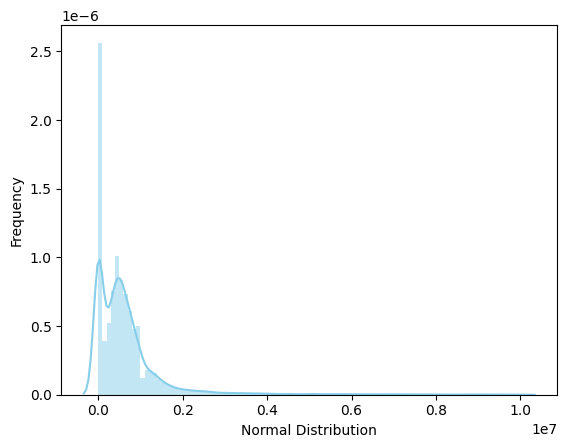

In [66]:
ax = sns.distplot(price,
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={'linewidth': 15, 'alpha':0.5})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')


## **Confindence Intervals**


In [67]:
df[['BOROUGH','TOTAL UNITS']].groupby('BOROUGH').sum()

,TOTAL UNITS
BOROUGH,
Manhattan,10380
Bronx,20775
Brooklyn,50631
Queens,25182
Staten Island,7347


In [68]:
total_unit = df['TOTAL UNITS'].sum()

In [71]:
p1 = 10380/total_unit
p1

0.09080173205616061

In [75]:
se1 = np.sqrt(p1*(1-p1)/total_unit)

In [76]:
z_score = 1.96
lcb = p1 - z_score * se1   #lower
ucb = p1 + z_score * se1   #upper
lcb, ucb

(0.08913609326235543, 0.0924673708499658)

## **Hypothesis Testing**
    

In [77]:
import statsmodels.api as sm

In [81]:
manhattan = df[df["BOROUGH"] == 1]
bronx = df[df["BOROUGH"] == 2]
brooklyn = df[df["BOROUGH"] == 3]
queens = df[df["BOROUGH"] == 4]
staten_island = df[df["BOROUGH"] == 5]

In [85]:
n1 = len(queens)
mu1 = queens["SALE PRICE"].mean()
sd1 = queens["SALE PRICE"].std()

n1, mu1, sd1

(0, nan, nan)

In [ ]:
n2 = len(5)
mu2 = queens["SALE PRICE"].mean()
sd2 = queens["SALE PRICE"].std()

n2, mu2, sd2

In [ ]:
sm.stats.ztest(brooklyn["SALE PRICE"].dropna(), queens["SALE PRICE"].dropna(), alternative='two-sided'